## Dataset Adult

### Import das bibliotecas

In [1]:
# leitura de dados
import numpy as np
import pandas as pd

# análises graficas
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning e estatística
import operator
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from lightgbm import LGBMClassifier

### Metodos auxiliares

In [2]:
def show_missings(df):
    '''
    mostra porcentagem de missings no dataframe
    '''
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     
                                     'percent_missing': percent_missing})

    missing_value_df = missing_value_df.sort_values('percent_missing', ascending=False).round(2)
    return (missing_value_df)


def calcula_metricas(method, dataset, clf, X, y):
    '''
    calcula métricas úteis
    '''
    # predictions
    pred = clf.predict(X)
    pred_proba = clf.predict_proba(X)[:, 1]
    
    # calcula métrias
    acc = accuracy_score(y, pred)
    f1 = f1_score(y, pred)
    precision = precision_score(y, pred)
    recall = recall_score(y, pred)
    auc = roc_auc_score(y, pred_proba)
    
    info = [method, dataset, acc, f1, precision, recall, auc]
    info_labels = ['metodo', 'dataset', 'accuracy', 'f1', 'precision', 'recall', 'auc']
    
    df_info = pd.DataFrame(columns=info_labels)
    df_info.loc[len(df_info)] = info
    return df_info

### Leitura dos dados

In [3]:
# leitura dos dados
df = pd.read_csv("adult.csv")

In [4]:
# primeiras 5 linhas
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
# shape
df.shape

(48842, 15)

In [6]:
# informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
# missings específicos
show_missings(df)

,column_name,percent_missing
age,age,0.0
workclass,workclass,0.0
fnlwgt,fnlwgt,0.0
education,education,0.0
educational-num,educational-num,0.0
marital-status,marital-status,0.0
occupation,occupation,0.0
relationship,relationship,0.0
race,race,0.0
gender,gender,0.0


In [8]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [9]:
# substitui valores faltantes
df['workclass'] = df['workclass'].replace('?', np.nan)
df['occupation'] = df['occupation'].replace('?', np.nan)
df['native-country'] = df['native-country'].replace('?', np.nan)

In [10]:
show_missings(df)

,column_name,percent_missing
occupation,occupation,5.75
workclass,workclass,5.73
native-country,native-country,1.75
age,age,0.00
fnlwgt,fnlwgt,0.00
education,education,0.00
educational-num,educational-num,0.00
marital-status,marital-status,0.00
relationship,relationship,0.00
race,race,0.00


In [11]:
df['workclass'].describe()

count       46043
unique          8
top       Private
freq        33906
Name: workclass, dtype: object

In [12]:
df.shape

(48842, 15)

### Tratamentos

In [13]:
# remove valores faltantes
df = df.dropna(how='any')

In [14]:
df.shape

(45222, 15)

In [15]:
# descrição dos dados
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [16]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

### Análises univariadas

Text(0, 0.5, 'Frequência')

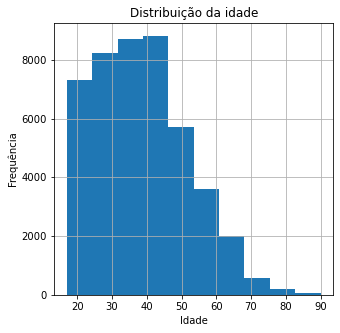

In [17]:
df['age'].hist(bins=10, figsize=(5,5))
plt.title('Distribuição da idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')

<AxesSubplot:>

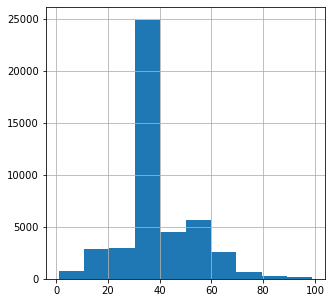

In [18]:
df['hours-per-week'].hist(bins=10, figsize=(5,5))

<AxesSubplot:>

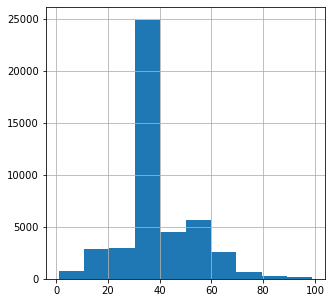

In [19]:
df['hours-per-week'].hist(bins=10, figsize=(5,5))

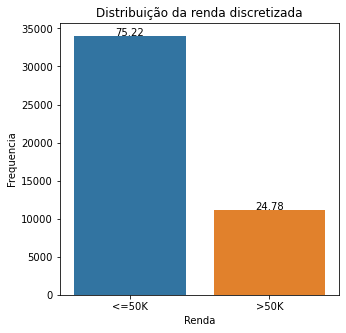

In [20]:
plt.figure(figsize=(5,5))
total = float(len(df) )

ax = sns.countplot(x="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")
plt.title('Distribuição da renda discretizada')
plt.xlabel('Renda')
plt.ylabel('Frequencia')
plt.show()

### Análises multivariadas

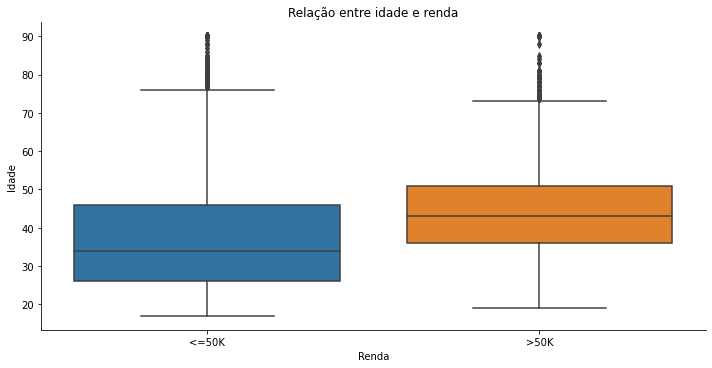

In [21]:
sns.catplot(data=df, x='income', y='age', kind='box', aspect=2)
plt.title('Relação entre idade e renda')
plt.xlabel('Renda')
plt.ylabel('Idade')
plt.show()

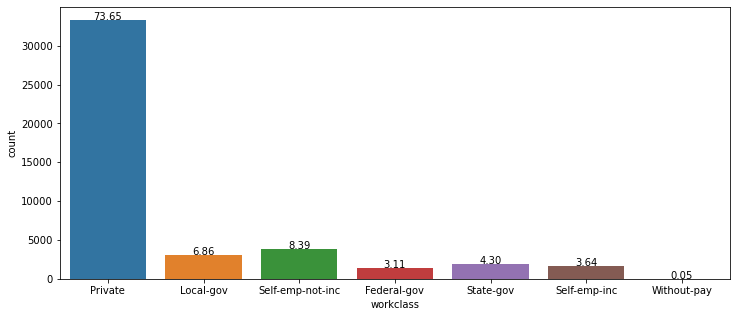

In [22]:
plt.figure(figsize=(12,5))

total = float(len(df['income']))

a = sns.countplot(x='workclass',data=df)

for f in a.patches:
    height = f.get_height()
    a.text(f.get_x() + f.get_width()/2., height+3, '{:1.2f}'.format((height/total)*100),ha="center")
plt.show()

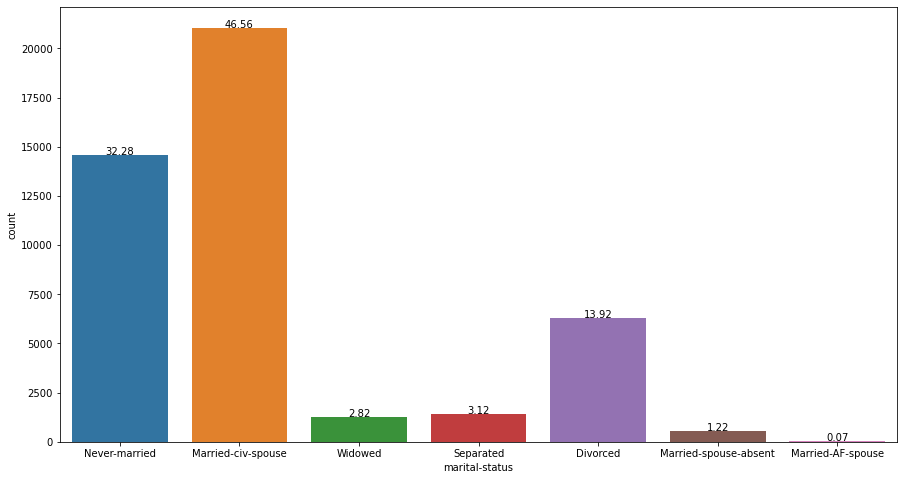

In [23]:
plt.figure(figsize=(15,8))
total = float(len(df))

ax = sns.countplot(x="marital-status", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

/home/yansym/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


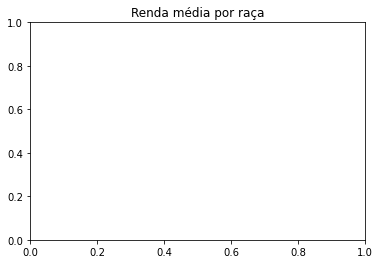

In [24]:
df.groupby('race', as_index=False)['income'].mean()
plt.title('Renda média por raça')
plt.show()

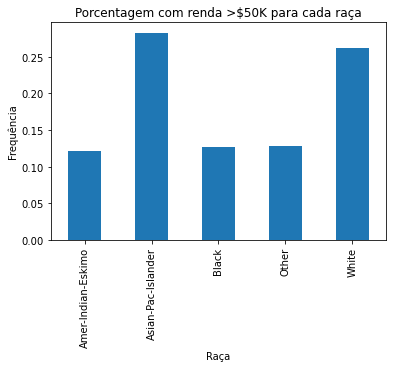

In [25]:
df_cpy = df.copy()
df_cpy['income'] = df_cpy['income'].replace('<=50K', 0)
df_cpy['income'] = df_cpy['income'].replace('>50K', 1)
df_cpy.groupby('race')['income'].mean().plot(kind='bar')
plt.title('Porcentagem com renda >$50K para cada raça')
plt.xlabel('Raça')
plt.ylabel('Frequência')
plt.show()

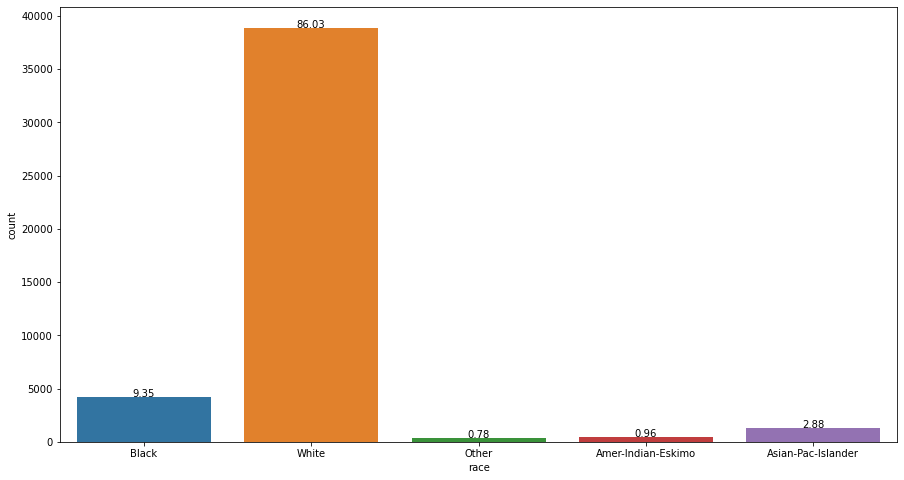

In [26]:
plt.figure(figsize=(15,8))
total = float(len(df))

ax = sns.countplot(x="race", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

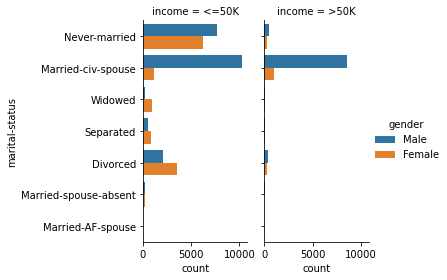

In [27]:
ct = sns.catplot(y='marital-status',
                 hue='gender',
                 col='income',
                 data=df,
                 kind='count',
                 height=4,aspect=0.7)

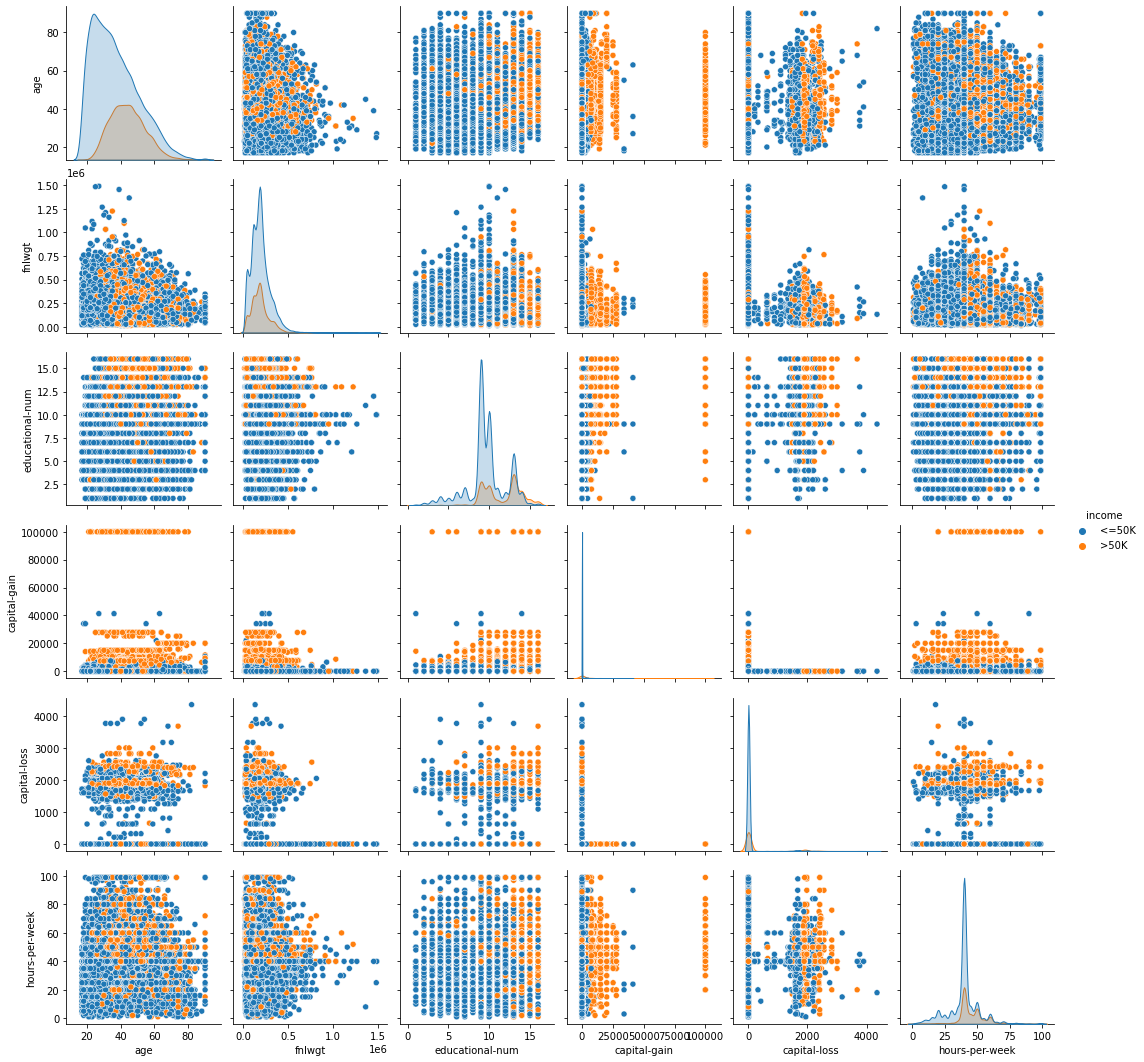

In [28]:
# plots
sns.pairplot(df, hue='income')

### Correlações

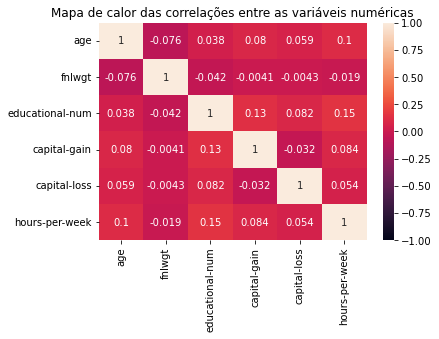

In [29]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Mapa de calor das correlações entre as variáveis numéricas')
plt.show()

### Modelagem de dados

In [30]:
# tratamento do target
df['income'] = df['income'].replace('<=50K', 0)
df['income'] = df['income'].replace('>50K', 1)

# dummies (one one encoding)
df_one_hot_encoding = pd.get_dummies(df)

# features e target
X = df_one_hot_encoding.drop('income', axis=1)
y = df_one_hot_encoding['income']

# features
features = X.columns.tolist()

# normalização dos dados
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

# treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
print (X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(45222, 104) (45222,) (36177, 104) (9045, 104) (36177,) (9045,)


In [31]:
# Lasso
pipeline = Pipeline([('model',Lasso())])

search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.001, 1, 0.01)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=0
                      )

# fit
search.fit(X_train, y_train)

# coef
coefficients = search.best_estimator_.named_steps['model'].coef_

# importance
importance = np.abs(coefficients)
features_select = np.array(features)[importance > 0]
print (f'Foram selecionadas {len(features_select)} de {len(features)} features')

Foram selecionadas 81 de 104 features


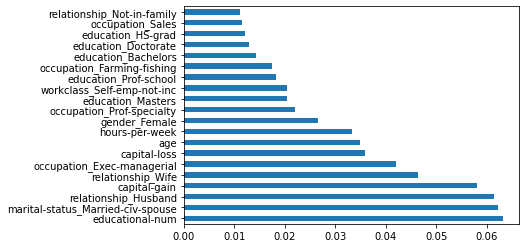

In [32]:
feat_importances = pd.Series(importance, index=features)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [33]:
# features e target
df_one_hot_encoding = df_one_hot_encoding.sample(10_000)

# X e y
X = df_one_hot_encoding[features_select]
y = df_one_hot_encoding['income']

# features
features = X.columns.tolist()

# normalização dos dados
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

# treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
print (X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10000, 81) (10000,) (8000, 81) (2000, 81) (8000,) (2000,)


### kNN

In [34]:
# knn
clf_knn = KNeighborsClassifier()

# create a dictionary of all values we want to test for n_neighbors
lista_valores_k = np.arange(2, 41)
param_grid = {'n_neighbors': lista_valores_k}

# use gridsearch to test all values for n_neighbors
clf = GridSearchCV(clf_knn, param_grid, cv=5)

# fit model to data
clf.fit(X_train, y_train)

# best params
print ('melhores hiperparametros', clf.best_params_)

# calcula resultados
dict_resultados = {}
dict_resultados[1] = calcula_metricas('knn', 'train', clf, X_train, y_train)
dict_resultados[2] = calcula_metricas('knn', 'test', clf, X_test, y_test)

# junta resultados
pd.concat(dict_resultados.values(), ignore_index=True)

melhores hiperparametros {'n_neighbors': 20}


,metodo,dataset,accuracy,f1,precision,recall,auc
0,knn,train,0.835,0.622642,0.733827,0.540715,0.891704
1,knn,test,0.830,0.610092,0.720867,0.528827,0.882449


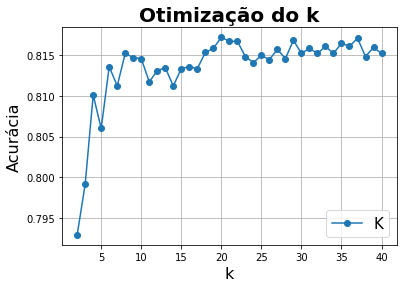

In [36]:
# Get Test Scores Mean and std for each grid search
scores = clf.cv_results_['mean_test_score']
lista_valores = lista_valores_k

# Plot Grid search scores
_, ax = plt.subplots(1,1)
ax.plot(lista_valores, scores, '-o', label='K')
ax.set_title("Otimização do k", fontsize=20, fontweight='bold')
ax.set_xlabel('k', fontsize=16)
ax.set_ylabel('Acurácia', fontsize=16)
ax.legend(loc="best", fontsize=15)
ax.grid('on')
plt.show()

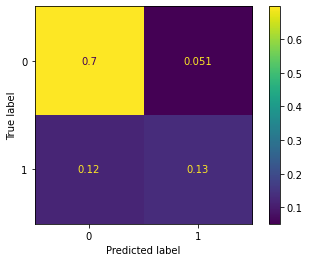

In [37]:
# matriz de confusão
plot_confusion_matrix(clf, X_test, y_test, normalize='all')

In [38]:
## calcula resultados
dict_resultados = {}

parameters = \
    [ \

        {
            'clf_name':'DecisionTreeClassifier',
            'clf': [DecisionTreeClassifier()],
            'clf__max_depth': [3, 5, 8],
            'clf__criterion': ['gini','entropy'],
            'clf__splitter': ['best','random'],
            'clf__class_weight':['balanced', None]
        },
     
         {
            'clf_name':'RandomForestClassifier',
            'clf': [RandomForestClassifier()],
            'clf__max_depth': [2, 4, 6, 8],
            'clf__criterion': ['gini','entropy']
        },
     
         {
            'clf_name':'LogisticRegression',
            'clf': [LogisticRegression()]
        },
     
        {
            'clf_name':'lgbm',
            'clf': [LGBMClassifier()],
            'clf__num_leaves': [8, 16, 32],
            'clf__subsample': [0.7, 0.75],
            'clf__learning_rate': [0.01],
            'clf__boosting_type': ['gbdt', 'dart']
        },
        {
            'clf_name':'SVC',
            'clf': [SVC()],
            'clf__C': [0.1],
            'clf__kernel': ['linear'],
            'clf__class_weight': ['balanced'],
            'clf__probability': [True]
        },
     
        {
            'clf_name':'MLPClassifier',
            'clf': [MLPClassifier()],
            'clf__activation': ['tanh', 'relu'],
            'clf__hidden_layer_sizes': [(6,5), (8,6)],
            'clf__learning_rate_init': [0.01, 0.02]
        }
     
    ]

# avalia múltiplos classificadores ao mesmo tempo
result=[]

index = 0
for params in parameters:
    
    # clf name
    clf_name = params['clf_name']
    
    print (f'clf: {clf_name}')
    
    # drop name
    params.pop('clf_name')

    # classifier
    clf = params['clf'][0]

    #getting arguments by popping out classifier
    params.pop('clf')

    #pipeline
    steps = [('clf',clf)]

    #cross validation using Grid Search
    clf_grid = GridSearchCV(Pipeline(steps), param_grid=params, cv=5)
    clf_grid.fit(X_train, y_train)

    #storing result
    result.append\
    (
        {
            'grid': clf_grid,
            'classifier': clf_grid.best_estimator_,
            'best score': clf_grid.best_score_,
            'best params': clf_grid.best_params_,
            'cv': clf_grid.cv
        }
    )
    
    dict_resultados[index] = calcula_metricas(clf_name, 'train', clf_grid, X_train, y_train)
    dict_resultados[index+1] = calcula_metricas(clf_name, 'test', clf_grid, X_test, y_test)
    index+=2

clf: DecisionTreeClassifier
clf: RandomForestClassifier
clf: LogisticRegression
clf: lgbm
clf: SVC
clf: MLPClassifier


/home/yansym/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [39]:
# sorting result by best score
result = sorted(result, key=operator.itemgetter('best score'),reverse=True)
result

[{'grid': GridSearchCV(cv=5,
               estimator=Pipeline(steps=[('clf', RandomForestClassifier())]),
               param_grid={'clf__criterion': ['gini', 'entropy'],
                           'clf__max_depth': [2, 4, 6, 8]}),
  'classifier': Pipeline(steps=[('clf', RandomForestClassifier(max_depth=8))]),
  'best score': 0.8428749999999999,
  'best params': {'clf__criterion': 'gini', 'clf__max_depth': 8},
  'cv': 5},
 {'grid': GridSearchCV(cv=5,
               estimator=Pipeline(steps=[('clf', DecisionTreeClassifier())]),
               param_grid={'clf__class_weight': ['balanced', None],
                           'clf__criterion': ['gini', 'entropy'],
                           'clf__max_depth': [3, 5, 8],
                           'clf__splitter': ['best', 'random']}),
  'classifier': Pipeline(steps=[('clf',
                   DecisionTreeClassifier(criterion='entropy', max_depth=8))]),
  'best score': 0.842125,
  'best params': {'clf__class_weight': None,
   'clf__criterion

In [40]:
# junta resultados
df_resultados = pd.concat(dict_resultados.values(), ignore_index=True)
df_resultados

,metodo,dataset,accuracy,f1,precision,recall,auc
0,DecisionTreeClassifier,train,0.861625,0.693606,0.783615,0.622145,0.917691
1,DecisionTreeClassifier,test,0.858000,0.681614,0.781491,0.604374,0.899405
2,RandomForestClassifier,train,0.855750,0.657973,0.816176,0.551142,0.921387
3,RandomForestClassifier,test,0.858500,0.663496,0.825444,0.554672,0.922958
4,LogisticRegression,train,0.845625,0.665945,0.731432,0.611221,0.903357
5,LogisticRegression,test,0.852500,0.673311,0.760000,0.604374,0.916119
6,lgbm,train,0.851875,0.627710,0.854577,0.496028,0.918516
7,lgbm,test,0.851500,0.630137,0.843333,0.502982,0.920173
8,SVC,train,0.775375,0.660623,0.533069,0.868421,0.896318
9,SVC,test,0.787500,0.678760,0.547561,0.892644,0.913478
